In [0]:
import numpy as np
import pandas as pd
!pip install -q xlrd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [128]:
file = 'OzTestDataScience.xlsx'

# Load spreadsheet
data = pd.ExcelFile(file)
df = data.parse('Sheet1')
df.set_index('ID', inplace=True)
df.head(2)
#data = pd.read_csv("OzTestDataScience.xlsx", index_col=0)
#data.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [129]:
df.shape

(30000, 24)

In [130]:
df.loc[df['default payment next month'] == 1]['default payment next month'].sum() / df['default payment next month'].count()

0.2212

## I see that 22% of the samples defaulted. My goal is to develop a model that recognize more than 22% defasults of the test samples. 

## Lets do some Discriptive Analysis

In [131]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [132]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [133]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [134]:
df['default payment next month'].sum() / df['default payment next month'].count()

0.2212

There is 22% of defults. So my goal is to find model with more than 22% of defaults .


In [135]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

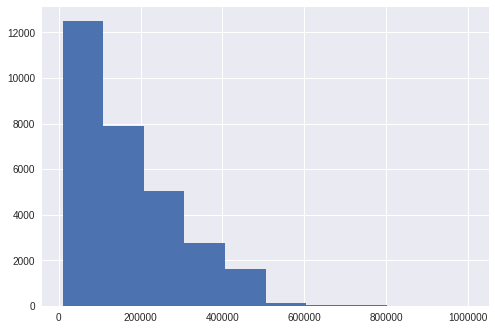

In [136]:
df.LIMIT_BAL.hist()

In [137]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

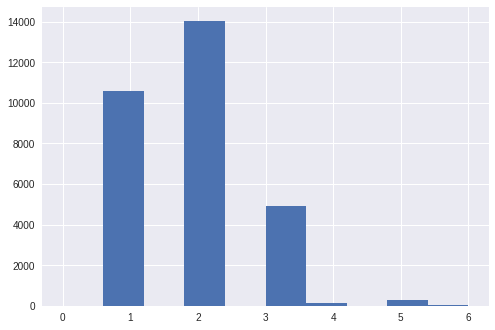

In [138]:
df.EDUCATION.hist()

Education: most of customers graduate university (2), and school (1). No difinition in the Information for values: 0, 5 and 6![alt text](https://)

In [139]:
df.MARRIAGE.value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

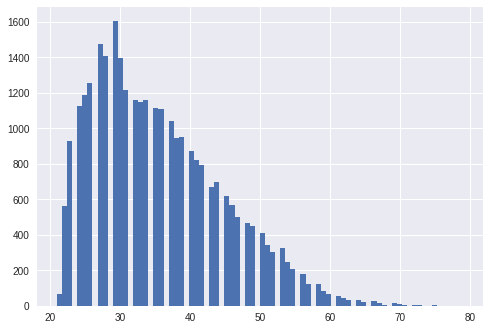

In [140]:
df.AGE.hist(grid = True, bins = 80)

## Lets do data preparation

### LIMIT_BAL will be grouped into 10 levels

In [0]:
def IncomeLevel(income):
    if income >= 0 and income < 100000:
        return 1
    if income >= 100000 and income < 200000:
        return 2
    if income >= 200000 and income < 300000:
        return 3
    if income >= 300000 and income < 400000:
        return 4
    if income >= 400000 and income < 500000:
        return 5
    if income >= 500000 and income < 600000:
        return 6
    if income >= 600000 and income < 700000:
        return 7
    if income >= 700000 and income < 800000:
        return 8
    if income >= 800000 and income < 900000:
        return 9
    if income >= 900000 :
        return 10

In [0]:
df['LIMIT_BAL_Level'] = df.LIMIT_BAL.apply(IncomeLevel)

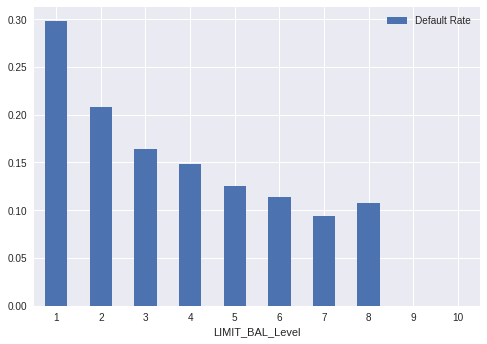

In [143]:
def default_rate(df_sub):
    return df_sub['default payment next month'].sum() / float(df_sub['default payment next month'].count())

pd2 = pd.DataFrame(df.groupby('LIMIT_BAL_Level').apply(default_rate))
pd2.columns = ['Default Rate']
pd2.plot.bar(rot=0)


### Conclusion:  There is negative association between the level of salary and the possibilty to default 

### Lets check MARRIAGE

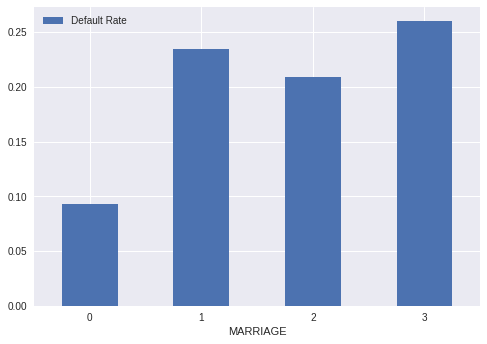

In [144]:
def default_rate(df_sub):
    return df_sub['default payment next month'].sum() / float(df_sub['default payment next month'].count())

pd2 = pd.DataFrame(df.groupby('MARRIAGE').apply(default_rate))
pd2.columns = ['Default Rate']
pd2.plot.bar(rot=0)

In [145]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

### Value 0 is neglected, so we cant use it as indicator for low default ration. We will not use thw MARRIAGE feature for our model

### Lets check SEX

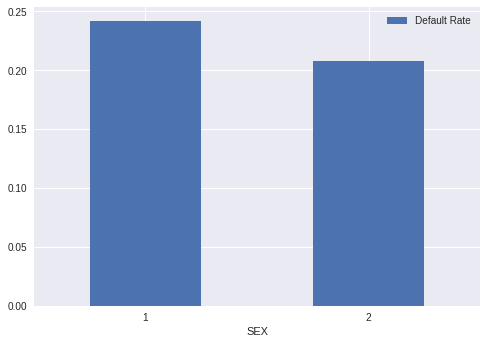

In [146]:
def default_rate(df_sub):
    return df_sub['default payment next month'].sum() / float(df_sub['default payment next month'].count())

pd2 = pd.DataFrame(df.groupby('SEX').apply(default_rate))
pd2.columns = ['Default Rate']
pd2.plot.bar(rot=0)

### We will not use thw SEX feature for our model. No much differnce in the default ratio

### Lets categorized Age:

In [0]:
df['AGE_level'] = pd.qcut(df['AGE'], 5,labels=[1,2,3,4,5])

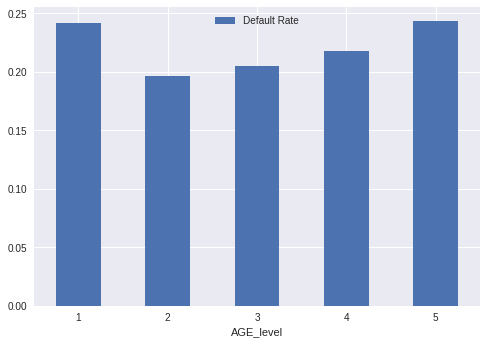

In [148]:
def default_rate(df_sub):
    return df_sub['default payment next month'].sum() / float(df_sub['default payment next month'].count())

pd2 = pd.DataFrame(df.groupby('AGE_level').apply(default_rate))
pd2.columns = ['Default Rate']
pd2.plot.bar(rot=0)


### Conclusion: We see no association between the age and default

### Lets take care of the times the customer did not paid on time:

In [0]:
def NumOfPayDelays(*argv):
  NumOfDelays = 0
  for arg in argv:
    for item in arg:
      if item > 0:
        NumOfDelays += 1
  return NumOfDelays

In [0]:
df['Num_Of_Pay_Delays'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(NumOfPayDelays, axis = 1)

### Lets see in a bar if the more delays in payements the more default: 

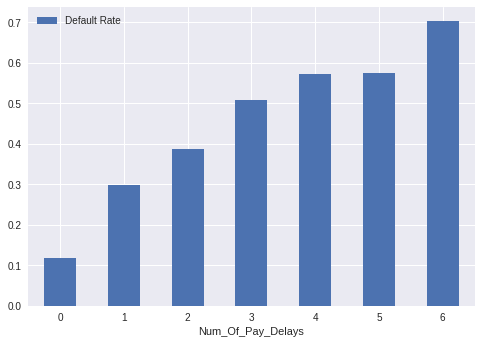

In [151]:
def default_rate(df_sub):
    return df_sub['default payment next month'].sum() / float(df_sub['default payment next month'].count())

pd2 = pd.DataFrame(df.groupby('Num_Of_Pay_Delays').apply(default_rate))
pd2.columns = ['Default Rate']
pd2.plot.bar(rot=0)


### Conclusion: We see strong positive association between number of delays of payements to the odds that this customer eventually defaults.

### Lets take care of the times the customer paid on time:

In [0]:
def NumOfPayOnTime(*argv):
  NumOfPays = 0
  for arg in argv:
    for item in arg:
      if item ==-1:
        NumOfPays += 1
  return NumOfPays

In [0]:
df['Num_Of_Pay_On_Time'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(NumOfPayOnTime, axis = 1)

### Lets see in a bar if the more pay on time the less default: 

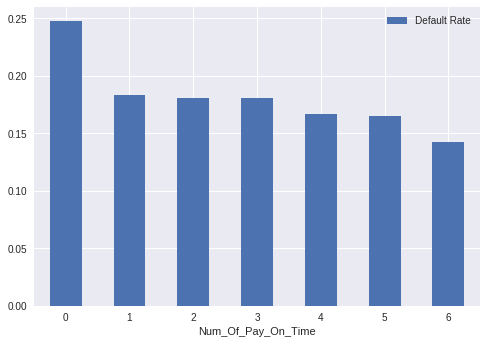

In [154]:
def default_rate(df_sub):
    return df_sub['default payment next month'].sum() / float(df_sub['default payment next month'].count())

pd2 = pd.DataFrame(df.groupby('Num_Of_Pay_On_Time').apply(default_rate))
pd2.columns = ['Default Rate']
pd2.plot.bar(rot=0)


In [155]:
df.groupby('Num_Of_Pay_On_Time').agg({'default payment next month': 'count'})

,default payment next month
Num_Of_Pay_On_Time,
0,19772
1,2252
2,1781
3,1372
4,1397
5,1434
6,1992


### Conclusion: We see slight association between number of payements on time to defaults.

## Lets check the sum of bills to pay and the actual payments the customer payed:

In [0]:
def SumOfItems(*argv):
  ttl = 0
  for arg in argv:
    for item in arg:
        ttl += item
  return ttl

In [0]:
df['Pay_By_Bill_Rate'] =  df[['PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1']].apply(SumOfItems, axis = 1) / df[['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2']].apply(SumOfItems, axis = 1)


In [0]:
#df.loc[df['Pay_By_Bill_Rate'].isnull()].count()

In [0]:
def cut_0_1 (rat):
    if rat < 0.05:
        return 1
    if rat >= 0.05 and rat < 0.1:
        return 2
    if rat >= 0.1 and rat < 0.15:
        return 3
#    if rat >= 0.15 and rat < 0.2:
#        return 4
    if rat >= 0.2:
        return 9

In [0]:
df['Pay_By_Bill_Rate_Categories'] = df['Pay_By_Bill_Rate'].apply(cut_0_1)

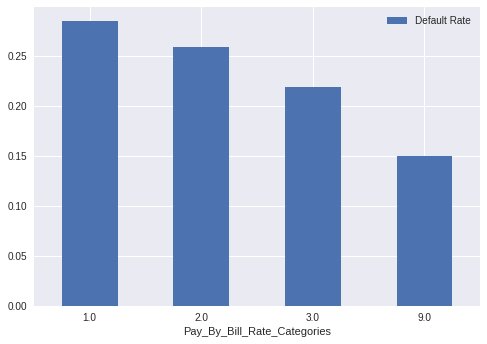

In [161]:
def default_rate(df_sub):
    return df_sub['default payment next month'].sum() / float(df_sub['default payment next month'].count())

pd2 = pd.DataFrame(df.groupby('Pay_By_Bill_Rate_Categories').apply(default_rate))
pd2.columns = ['Default Rate']
pd2.plot.bar(rot=0)

In [162]:
df['Pay_By_Bill_Rate_Categories'].value_counts().sort_index()

1.0     8861
2.0     5513
3.0     1592
9.0    11981
Name: Pay_By_Bill_Rate_Categories, dtype: int64

In [163]:
type(pd.get_dummies(df['Pay_By_Bill_Rate_Categories'] ,prefix='Pay_By_Bill'))

pandas.core.frame.DataFrame

In [0]:
df_pbb = pd.get_dummies(df['Pay_By_Bill_Rate_Categories'] ,prefix='Pay_By_Bill')

In [0]:
df['Pay_By_Bill_1.0'] = df_pbb['Pay_By_Bill_1.0']
df['Pay_By_Bill_2.0'] = df_pbb['Pay_By_Bill_2.0']
df['Pay_By_Bill_3.0'] = df_pbb['Pay_By_Bill_3.0']
df['Pay_By_Bill_9.0'] = df_pbb['Pay_By_Bill_9.0']

### So we will add the dummies of 'Pay_By_Bill_Rate_Categories' to the model.



## my first model is Logestic Regression:

In [166]:
X = df[['Pay_By_Bill_1.0','Pay_By_Bill_2.0','Pay_By_Bill_3.0','Pay_By_Bill_9.0','Num_Of_Pay_On_Time','Num_Of_Pay_Delays','LIMIT_BAL_Level']]
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)
X_train.shape, X_test.shape

((21000, 7), (9000, 7))

In [167]:
(y_test == 1).sum() / (y_test == 1).count()

0.21955555555555556

In [168]:
(y_test == 1).sum()

1976

In [169]:
485 / 1976

0.24544534412955465

In [170]:
reg_clf = LogisticRegression(C=20.0).fit(X_train, y_train)
y_test_pred = reg_clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [171]:
cm = confusion_matrix(y_true=y_test.values,
                      y_pred=y_test_pred)
pd.DataFrame(cm,
             index=reg_clf.classes_,
             columns=reg_clf.classes_)

,0,1
0,6737,287
1,1491,485


In [172]:
print(classification_report(y_true=y_test.values,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7024
           1       0.63      0.25      0.35      1976

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.72      0.60      0.62      9000
weighted avg       0.78      0.80      0.77      9000



## Lets try to make dummies all  the cstagorials features :

In [0]:
df_pbb = pd.get_dummies(df['Num_Of_Pay_On_Time'] ,prefix='Pay_On_Time')

In [0]:
df['Pay_On_Time_0'] = df_pbb['Pay_On_Time_0']
df['Pay_On_Time_1'] = df_pbb['Pay_On_Time_1']
df['Pay_On_Time_2'] = df_pbb['Pay_On_Time_2']
df['Pay_On_Time_3'] = df_pbb['Pay_On_Time_3']
df['Pay_On_Time_4'] = df_pbb['Pay_On_Time_4']
df['Pay_On_Time_5'] = df_pbb['Pay_On_Time_5']
df['Pay_On_Time_6'] = df_pbb['Pay_On_Time_6']

In [0]:
df_pbb = pd.get_dummies(df['Num_Of_Pay_Delays'] ,prefix='Pay_Delays')

In [0]:
df['Pay_Delays_0'] = df_pbb['Pay_Delays_0']
df['Pay_Delays_1'] = df_pbb['Pay_Delays_1']
df['Pay_Delays_2'] = df_pbb['Pay_Delays_2']
df['Pay_Delays_3'] = df_pbb['Pay_Delays_3']
df['Pay_Delays_4'] = df_pbb['Pay_Delays_4']
df['Pay_Delays_5'] = df_pbb['Pay_Delays_5']
df['Pay_Delays_6'] = df_pbb['Pay_Delays_6']

In [0]:
df_pbb = pd.get_dummies(df['LIMIT_BAL_Level'] ,prefix='BAL')

In [178]:
df_pbb.head()

,BAL_1,BAL_2,BAL_3,BAL_4,BAL_5,BAL_6,BAL_7,BAL_8,BAL_9,BAL_10
ID,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0


In [0]:
df['BAL_1'] = df_pbb['BAL_1']
df['BAL_2'] = df_pbb['BAL_2']
df['BAL_3'] = df_pbb['BAL_3']
df['BAL_4'] = df_pbb['BAL_4']
df['BAL_5'] = df_pbb['BAL_5']
df['BAL_6'] = df_pbb['BAL_6']
df['BAL_7'] = df_pbb['BAL_7']
df['BAL_8'] = df_pbb['BAL_8']
df['BAL_9'] = df_pbb['BAL_9']
df['BAL_10'] = df_pbb['BAL_10']

In [180]:
X = df[['Pay_By_Bill_1.0','Pay_By_Bill_2.0','Pay_By_Bill_3.0','Pay_By_Bill_9.0','Pay_On_Time_0','Pay_On_Time_1','Pay_On_Time_2',
        'Pay_On_Time_3','Pay_On_Time_4','Pay_On_Time_5','Pay_On_Time_6','Pay_Delays_0','Pay_Delays_1','Pay_Delays_2',
        'Pay_Delays_3','Pay_Delays_4','Pay_Delays_5','Pay_Delays_6',
        'BAL_1','BAL_2','BAL_3','BAL_4','BAL_5','BAL_6','BAL_7','BAL_8','BAL_9']]
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)
X_train.shape, X_test.shape

((21000, 27), (9000, 27))

In [181]:
reg_clf = LogisticRegression(C=1.0).fit(X_train, y_train)
y_test_pred = reg_clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [182]:
cm = confusion_matrix(y_true=y_test.values,
                      y_pred=y_test_pred)
pd.DataFrame(cm,
             index=reg_clf.classes_,
             columns=reg_clf.classes_)

,0,1
0,6657,367
1,1413,563


In [183]:
print(classification_report(y_true=y_test.values,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7024
           1       0.61      0.28      0.39      1976

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.72      0.62      0.63      9000
weighted avg       0.78      0.80      0.77      9000



I found 28% of the defaults and 95% of the non-defaults.
Not too good...

In [184]:
reg_clf.intercept_

array([-0.04856259])

In [185]:
reg_clf.coef_

array([[-0.23754863, -0.38949277, -0.35916204, -0.59472552, -0.14171978,
        -0.282606  , -0.09207546, -0.07795527,  0.00945247,  0.13655653,
         0.39978492, -1.66863608, -0.54330554, -0.1650444 ,  0.29757369,
         0.58772588,  0.36686922,  1.07625464,  0.41734802,  0.10248061,
         0.06823108,  0.0551472 , -0.08685727, -0.1811412 , -0.24238609,
         0.03470105, -0.15122548]])

## Now we will use a Decision Tree Model:

In [0]:
digits_dt = DecisionTreeClassifier(max_depth=6,
                                   min_samples_split=5,
                                   min_samples_leaf=5)

In [0]:
dt_clf = digits_dt.fit(X_train, y_train)
y_test_pred = dt_clf.predict(X_test)

In [188]:
cm = confusion_matrix(y_true=y_test.values,
                      y_pred=y_test_pred)
pd.DataFrame(cm,
             index=reg_clf.classes_,
             columns=reg_clf.classes_)

,0,1
0,6600,424
1,1354,622


In [189]:
print(classification_report(y_true=y_test.values,
                            y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7024
           1       0.59      0.31      0.41      1976

   micro avg       0.80      0.80      0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000



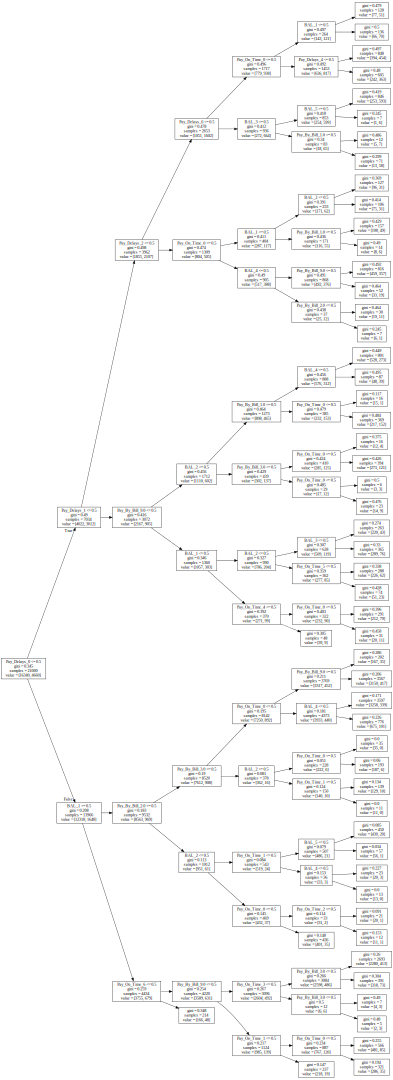

In [190]:
from graphviz import Source
from sklearn import tree
import pydot

dot_data = tree.export_graphviz(dt_clf, out_file=None, feature_names=X.columns, rotate=True)
pdot = pydot.graph_from_dot_data(dot_data)
# Access element [0] because graph_from_dot_data actually returns a list of DOT elements.
pdot[0].set_graph_defaults(size = "\"15,15\"")
graph = Source(pdot[0].to_string())
graph

## I think that both models are smilar, because although the DT succeeded to find 31% of the defaults, yet it came with the price of wrongly say that sombody would default when he doesn't (the precision decresed to 59%). 
## In general, the Logestic Regression model is simper to deploy so i choose it.